In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import spearmanr as sp
from scipy.stats import pearsonr as pn

У населения замерили кровяное давление в организме, а также для каждого опрошенного примерно установили его средний уровень ежедневной физической нагрузки. Данные содержатся в файле *Physics - Blood.xlsx*

Описание данных:

- *Лист Physics - Blood*.
  1. *CLIENT* — идентификатор клиента (может повторяться);
  2. *DATE* — дата замера показателей;
  3. *PHYSICS* — численная оценка физической активности (чем больше оценка, тем больше физическая активность);
  4. *BLOOD* — показатель кровяного давления.

- *Лист cl_segm*.
  1. *CLIENT* — идентификатор клиента (может повторяться);
  2. *CITY* — город проведения опроса.

Нужно определить зависимость между физической активностью и показателем кровяного давления.
- Выводы сопроводи расчётами и визуализацией.
- Сравни эффективность коэффициентов корреляции Спирмена и Пирсона.

Используй следующий алгоритм:
  1. Произвести импорт и очистку данных (2 балла)\
     1.1. Выявить абсолютные дубли и удалить их.\
     1.2. Если на одного клиента есть несколько наблюдений, усреднить их (и по physics, и по blood).

  2. Визуализировать данные  (2 балла)\
     2.1. Оценить данные с помощью диаграммы рассеивания (scatterplot).\
     2.2. Оценить данные с помощью гистограммы (histplot).\
     2.3. Оценить данные с помощью «ящика с усами» (boxplot).

  3. Рассчитать корреляцию Спирмена и корреляцию Пирсона на исходных данных. Какие выводы можно сделать? (1.5 балла)

  4. Избавиться от выбросов и вновь произвести расчёт коэффициентов корреляции. Какие изменения можно наблюдать? (2 балла)

  5. Произвести такой же анализ для каждого города по отдельности. Как можно оценить вариативность самих показателей и корреляции этих показателей по городам? (2.5 балла)

In [ ]:
df_blood = pd.read_excel('https://drive.google.com/uc?export=download&id=1-meZdutjpVPUtMIUIEPu0got8bi1phI-', sheet_name='Physics - Blood')
df_city = pd.read_excel('https://drive.google.com/uc?export=download&id=1-meZdutjpVPUtMIUIEPu0got8bi1phI-', sheet_name='cl_segm')

In [ ]:
df_blood.head()

,CLIENT,DATE,PHYSICS,BLOOD
0,1204830,2024-02-28,48,126
1,1203930,2024-01-16,50,138
2,1203474,2024-02-26,82,90
3,1205551,2024-02-22,86,159
4,1204790,2024-02-26,51,121


In [ ]:
df_city.head()

,CLIENT,CITY
0,1204830,Москва
1,1203930,Москва
2,1203474,Санкт-Петербург
3,1205551,Казань
4,1204790,Москва


In [ ]:
df_blood = df_blood.groupby('CLIENT').mean().reset_index()
df = pd.merge(df_blood, df_city, how="left", on='CLIENT')
df.drop_duplicates(keep=False, inplace=True)

In [ ]:
df.head()

,CLIENT,DATE,PHYSICS,BLOOD,CITY
0,1203401,2024-02-22,109.0,84.0,Санкт-Петербург
1,1203402,2024-01-21,87.0,97.0,Москва
2,1203404,2024-02-05,57.0,127.0,Москва
3,1203405,2024-02-06,103.0,86.0,Москва
4,1203407,2024-01-30,95.0,150.0,Санкт-Петербург


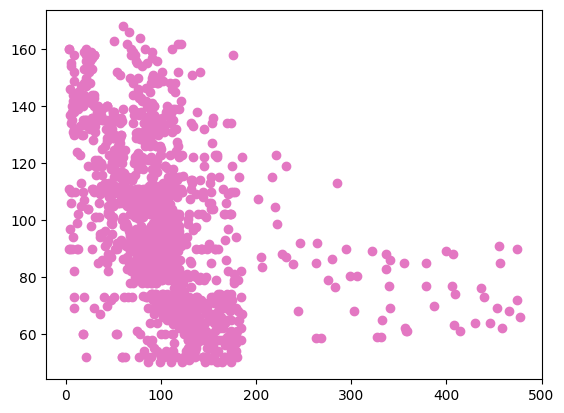

In [ ]:
plt.scatter(df['PHYSICS'], df['BLOOD'], c='tab:pink')

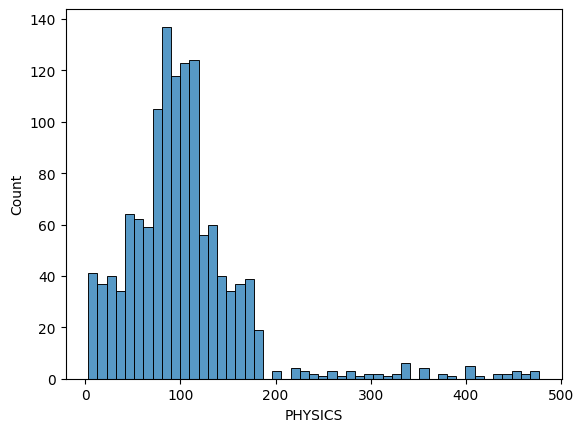

In [ ]:
sns.histplot(df['PHYSICS'])
plt.show()

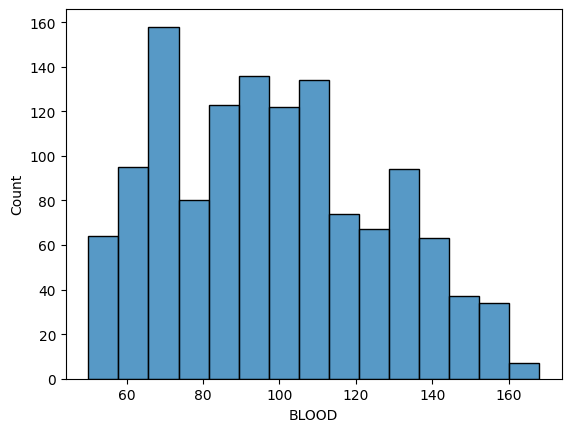

In [ ]:
sns.histplot(df['BLOOD'])
plt.show()

<Axes: xlabel='PHYSICS', ylabel='BLOOD'>

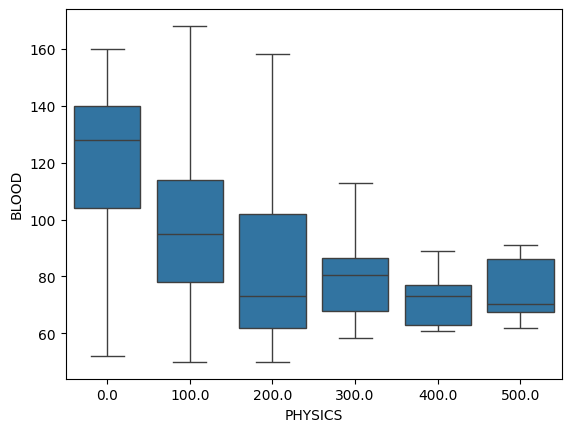

In [ ]:
sns.boxplot(x=df['PHYSICS'].round(-2), y=df['BLOOD'])

<Axes: ylabel='PHYSICS'>

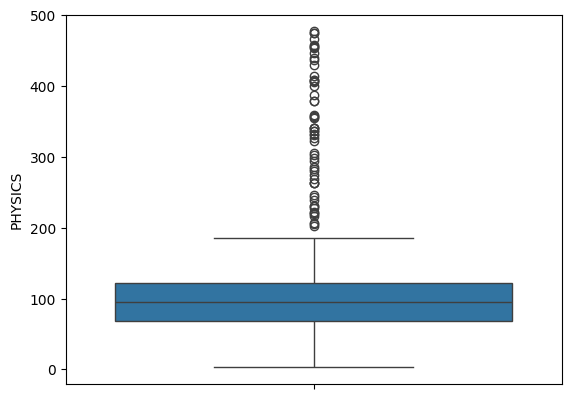

In [ ]:
sns.boxplot(df['PHYSICS'])

<Axes: ylabel='BLOOD'>

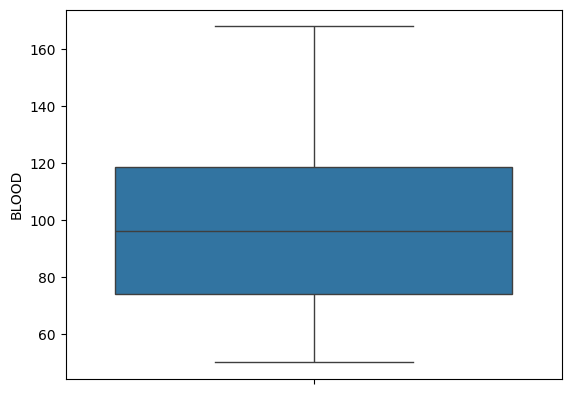

In [ ]:
sns.boxplot(df['BLOOD'])

In [ ]:
print('Результаты для корреляции Спирмена:', sp(df['PHYSICS'], b=df['BLOOD']))

Результаты для корреляции Спирмена: SignificanceResult(statistic=-0.5352987373963166, pvalue=2.1509018067150475e-96)


In [ ]:
print('Результаты для корреляции Пирсона:', pn(df['PHYSICS'], df['BLOOD']))

Результаты для корреляции Пирсона: PearsonRResult(statistic=-0.4279317357572325, pvalue=1.6991365962939308e-58)


pvalue для обоих тестов >>0.05. Так как нулевая гипотеза была о том, что данные не коррелируют, то на самом деле между этими двумя показателями есть корреляция

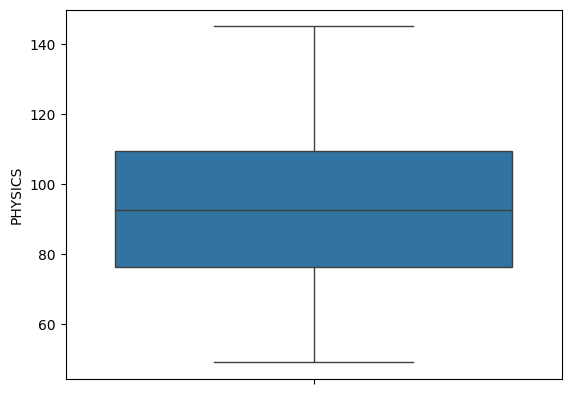

<Axes: ylabel='BLOOD'>

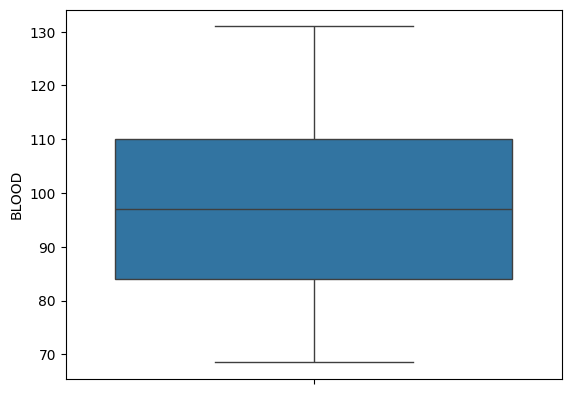

In [ ]:
Q1B =  df['BLOOD'].quantile(0.15)
Q3B = df['BLOOD'].quantile(0.85)
Q1P =  df['PHYSICS'].quantile(0.15)
Q3P = df['PHYSICS'].quantile(0.85)
df = df[(df['BLOOD'] > Q1B) & (df['BLOOD'] < Q3B) & (df['PHYSICS'] > Q1P) & (df['PHYSICS'] < Q3P)]

sns.boxplot(df['PHYSICS'])
plt.show()
sns.boxplot(df['BLOOD'])

Результаты для новой корреляции Спирмена: SignificanceResult(statistic=-0.35874971957785956, pvalue=1.4380091926450281e-21)
Результаты для новой корреляции Пирсона: PearsonRResult(statistic=-0.35915281282253375, pvalue=1.2870793375394044e-21)
Корреляция присутствует


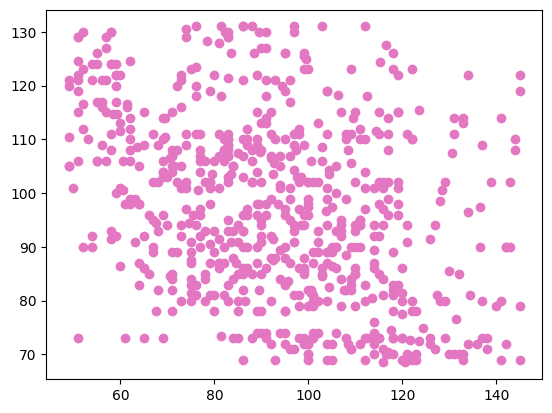

In [ ]:
print('Результаты для новой корреляции Спирмена:', sp(df['PHYSICS'], b=df['BLOOD']))
print('Результаты для новой корреляции Пирсона:', pn(df['PHYSICS'], df['BLOOD']))
print('Корреляция присутствует')
plt.scatter(df['PHYSICS'], df['BLOOD'], c='tab:pink')

In [ ]:
df_spb = df[df['CITY'] == 'Санкт-Петербург']
df_spb.reset_index(inplace=True)
df_spb.head()

,index,CLIENT,DATE,PHYSICS,BLOOD,CITY
0,0,1203401,2024-02-22,109.0,84.0,Санкт-Петербург
1,19,1203431,2024-02-13,57.0,129.0,Санкт-Петербург
2,22,1203437,2024-02-15,97.0,81.0,Санкт-Петербург
3,43,1203471,2024-02-17,83.0,110.0,Санкт-Петербург
4,45,1203474,2024-02-26,82.0,90.0,Санкт-Петербург


In [ ]:
df_mos = df[df['CITY'] == 'Москва']
df_mos.reset_index(inplace=True)
df_mos.head()

,index,CLIENT,DATE,PHYSICS,BLOOD,CITY
0,1,1203402,2024-01-21,87.0,97.0,Москва
1,2,1203404,2024-02-05,57.0,127.0,Москва
2,3,1203405,2024-02-06,103.0,86.0,Москва
3,5,1203408,2024-01-13,85.0,80.0,Москва
4,8,1203413,2024-01-30,96.0,95.0,Москва


Результаты для корреляции Спирмена для СПб: SignificanceResult(statistic=-0.40943084107243033, pvalue=3.0707990750200508e-09)
Результаты для корреляции Пирсона для СПб: PearsonRResult(statistic=-0.39644949396115226, pvalue=1.0499977474896035e-08)
Корреляция присутствует


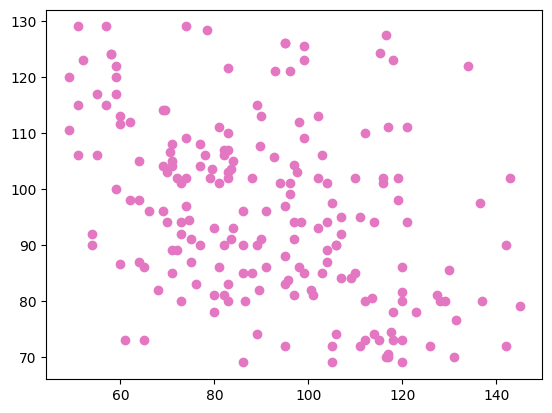

In [ ]:
print('Результаты для корреляции Спирмена для СПб:', sp(df_spb['PHYSICS'], b=df_spb['BLOOD']))
print('Результаты для корреляции Пирсона для СПб:', pn(df_spb['PHYSICS'], df_spb['BLOOD']))
print('Корреляция присутствует')
plt.scatter(df_spb['PHYSICS'], df_spb['BLOOD'], c='tab:pink')

Результаты для корреляции Спирмена для Москвы: SignificanceResult(statistic=-0.3855669068826879, pvalue=9.520832775434857e-13)
Результаты для корреляции Пирсона для Москвы: PearsonRResult(statistic=-0.38129600792392687, pvalue=1.768614380390023e-12)
Корреляция присутствует


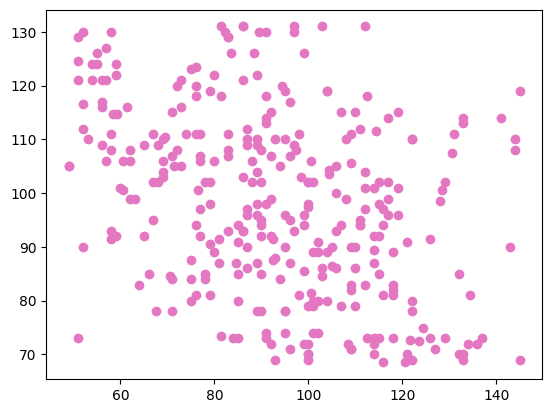

In [ ]:
print('Результаты для корреляции Спирмена для Москвы:', sp(df_mos['PHYSICS'], b=df_mos['BLOOD']))
print('Результаты для корреляции Пирсона для Москвы:', pn(df_mos['PHYSICS'], df_mos['BLOOD']))
print('Корреляция присутствует')
plt.scatter(df_mos['PHYSICS'], df_mos['BLOOD'], c='tab:pink')

Результаты для обоих городов примерно одинаковые